In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## <span style="color: blue;">🔹 STEP 0</span>

**`Preparation`**
- Import the necessary libraries and load the dataset.

In [1]:
''' '' '' '' '' '' '' '' '' '' '' '' ''
Preparation
'' '' '' '' '' '' '' '' '' '' '' '' '''
import numpy as np
import pandas as pd

train_df = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
test_df = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')


## <span style="color: blue;">🔹 STEP 1</span>

**`Problem Description`**
- In this task, we will build a model to classify whether a tweet is about a disaster or not. We will analyze text data using NLP (Natural Language Processing) techniques.

**`NLP Description`**
- Natural Language Processing (NLP) is a technology used to extract and analyze meaning from text data. It has many applications such as chatbots, search engines, sentiment analysis, and machine translation.

**`Data`**
- Size: The training dataset consists of approximately 10,000 tweets
- Dimensions: Each tweet has 5 columns: id, keyword, location, text, target
- Structure: text is the tweet's text, target indicates whether the tweet is related to a disaster (1) or not (0)


In [2]:
''' '' '' '' '' '' '' '' '' '' '' '' ''
Data
'' '' '' '' '' '' '' '' '' '' '' '' '''
import pandas as pd
from IPython.display import display, HTML

# Checking the data
shape_html = f"<p><b>Data Shape:</b> {train_df.shape}</p>"
columns_html = f"<p><b>Columns:</b> {', '.join(train_df.columns)}</p>"
head_html = train_df.head().to_html()

display(HTML(shape_html + columns_html + head_html))


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


## <span style="color: blue;">🔹 STEP 2</span>



**`Analysis Plan`**

- The goal of EDA (Exploratory Data Analysis) is to understand the basic characteristics of the data, identify outliers and missing values, and determine the need for data cleaning and preprocessing. This helps to improve the quality of the data and establishes a foundation for enhancing the model's performance.


**`Visualization`**

Visualize the data to check the distributions.

1. Histogram of target distribution
2. Distribution of text length
3. Frequency distribution of keywords
4. Frequency distribution of locations


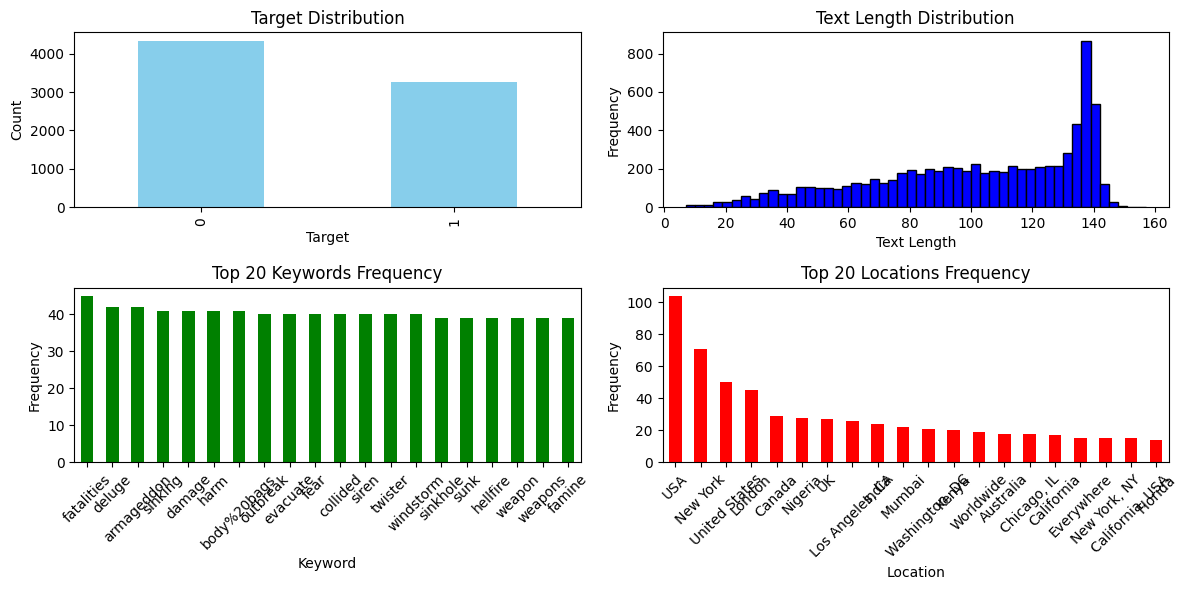

In [45]:
''' '' '' '' '' '' '' '' '' '' '' '' ''
Visualization
'' '' '' '' '' '' '' '' '' '' '' '' '''
import matplotlib.pyplot as plt

# Histogram of target distribution
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
train_df['target'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Target Distribution')
plt.xlabel('Target')
plt.ylabel('Count')

# Distribution of text length
train_df['text_length'] = train_df['text'].apply(len)
plt.subplot(2, 2, 2)
plt.hist(train_df['text_length'], bins=50, color='blue', edgecolor='black')
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

# Frequency distribution of keywords
keywords = train_df['keyword'].dropna()
keyword_counts = keywords.value_counts().head(20)
plt.subplot(2, 2, 3)
keyword_counts.plot(kind='bar', color='green')
plt.title('Top 20 Keywords Frequency')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Frequency distribution of locations
locations = train_df['location'].dropna()
location_counts = locations.value_counts().head(20)
plt.subplot(2, 2, 4)
location_counts.plot(kind='bar', color='red')
plt.title('Top 20 Locations Frequency')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**`Data Cleaning`**

We will remove noise and unnecessary information from the dataset to make it suitable for analysis and model training.

1. Remove URLs
1. Remove mentions (@username)
1. Remove hashtags (#keyword)
1. Remove special characters
1. Convert to lowercase


In [8]:
# Data Cleaning
import re

def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'\@\w+', '', text)    # Remove mentions
    text = re.sub(r'\#\w+', '', text)    # Remove hashtags
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    return text

train_df['text'] = train_df['text'].apply(clean_text)
test_df['text'] = test_df['text'].apply(clean_text)


## <span style="color: blue;">🔹 STEP 3</span>

Construct sequential neural network models and use different approaches to classify text data.

**`Building Sequential Neural Network Models`**


1. Logistic Regression
    - The model outputs probability values and classifies as the positive class if a certain threshold is exceeded. It is a basic baseline model for text data classification.
    - Reason for selection: Widely used in binary classification problems. Simple and easy to interpret.
    
    
1. Ridge Classifier
    - A model that adds a regularization term to logistic regression. Regularization prevents overfitting and helps build a more generalized model.
    - Reason for selection: Robust model for high-dimensional text data.
    
    
1. GRU
    - GRU has two gates: reset gate and update gate. Like LSTM, it can capture long-term dependencies, but with lower computational cost, making it suitable for large datasets. It has the ability to capture the sequential characteristics of text data and shows excellent performance.
    - Reason for selection: GRU is a simplified version of LSTM with higher computational efficiency. Suitable for processing sequential and time-series data.


In [9]:
# Building Model 1 (Logistic Regression)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Vectorizing the text
vectorizer = TfidfVectorizer(max_features=10000)
X_train = vectorizer.fit_transform(train_df['text'])
X_test = vectorizer.transform(test_df['text'])

# Building the model
model1 = LogisticRegression()
model1.fit(X_train, train_df['target'])


LogisticRegression()

**`Hyperparameter Tuning for Model 1 (Logistic Regression)`**
- Using Grid Search to find the optimal parameters.


In [10]:
''' '' '' '' '' '' '' '' '' '' '' '' ''
Hyperparameter Tuning for Model 1 (Logistic Regression)
'' '' '' '' '' '' '' '' '' '' '' '' '''
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import pandas as pd
import matplotlib.pyplot as plt

# Setting the range of hyperparameters for logistic regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500, 1000]
}

# Using Grid Search to find the optimal hyperparameters
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, train_df['target'])

# Displaying the optimal hyperparameters
best_params = grid_search.best_params_
print(f'Best hyperparameters: {best_params}')

# Displaying the Grid Search results
results = pd.DataFrame(grid_search.cv_results_)
results = results[['param_C', 'param_solver', 'param_max_iter', 'mean_test_score']]
results = results.sort_values(by='mean_test_score', ascending=False)

# Adding "Best" to the best score
best_score = results['mean_test_score'].max()
results['Best'] = results['mean_test_score'].apply(lambda x: 'Best' if x == best_score else '')

# Displaying in tabular format
styled_results = results.style.background_gradient(cmap='viridis').applymap(lambda x: 'background-color: yellow; color: black' if x == 'Best' else '')
display(styled_results)

# Predicting with the optimal model
best_model = grid_search.best_estimator_
best_model.fit(X_train, train_df['target'])

# Calculating the F1 score of the optimal model
logistic_scores = cross_val_score(best_model, X_train, train_df['target'], cv=5, scoring='f1')
logistic_mean_score = logistic_scores.mean()
print(f'Logistic Regression Mean F1 Score with Best Params: {logistic_mean_score}')

# Predicting with the optimal model on the test data
pred1 = best_model.predict(X_test)


Best hyperparameters: {'C': 1, 'max_iter': 200, 'solver': 'saga'}


,param_C,param_solver,param_max_iter,mean_test_score,Best
19,1,saga,200,0.618953,Best
21,1,saga,500,0.618953,Best
23,1,saga,1000,0.618739,
17,1,saga,100,0.618426,
18,1,liblinear,200,0.618332,
16,1,liblinear,100,0.618332,
22,1,liblinear,1000,0.618332,
20,1,liblinear,500,0.618332,
29,10,saga,500,0.607382,
27,10,saga,200,0.606897,


Logistic Regression Mean F1 Score with Best Params: 0.6185454302744425


In [11]:
''' '' '' '' '' '' '' '' '' '' '' '' ''
Building Model 2 (Ridge Classifier)
'' '' '' '' '' '' '' '' '' '' '' '' '''
from sklearn.linear_model import RidgeClassifier

# Constructing the model
model2 = RidgeClassifier()
model2.fit(X_train, train_df['target'])


RidgeClassifier()

In [12]:
''' '' '' '' '' '' '' '' '' '' '' '' ''
Optimizing Hyperparameters for Model 2 (Ridge Classifier)
'' '' '' '' '' '' '' '' '' '' '' '' '''
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import f1_score
import pandas as pd
import matplotlib.pyplot as plt

# Setting the hyperparameter range for Ridge Classifier
param_grid_ridge = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'solver': ['auto', 'lsqr', 'sparse_cg', 'sag', 'lbfgs'],
    'max_iter': [100, 200, 500, 1000]
}

# Using grid search to find the best hyperparameters
grid_search_ridge = GridSearchCV(RidgeClassifier(), param_grid_ridge, cv=5, scoring='f1')
grid_search_ridge.fit(X_train, train_df['target'])

# Displaying the best hyperparameters
best_params_ridge = grid_search_ridge.best_params_
print(f'Best hyperparameters: {best_params_ridge}')

# Displaying the grid search results
results_ridge = pd.DataFrame(grid_search_ridge.cv_results_)
results_ridge = results_ridge[['param_alpha', 'param_solver', 'param_max_iter', 'mean_test_score']]
results_ridge = results_ridge.sort_values(by='mean_test_score', ascending=False)

# Adding "Best" to the best score
best_score_ridge = results_ridge['mean_test_score'].max()
results_ridge['Best'] = results_ridge['mean_test_score'].apply(lambda x: 'Best' if x == best_score_ridge else '')

# Displaying the results in tabular form
styled_results_ridge = results_ridge.style.background_gradient(cmap='viridis').map(lambda x: 'background-color: yellow; color: black' if x == 'Best' else '')
display(styled_results_ridge)

# Predicting with the best model
best_model_ridge = grid_search_ridge.best_estimator_
best_model_ridge.fit(X_train, train_df['target'])

# Calculating the F1 score of the best model
ridge_scores = cross_val_score(best_model_ridge, X_train, train_df['target'], cv=5, scoring='f1')
ridge_mean_score = ridge_scores.mean()
print(f'Ridge Classifier Mean F1 Score with Best Params: {ridge_mean_score}')

# Predicting on the test data with the best model
pred2 = best_model_ridge.predict(X_test)


Best hyperparameters: {'alpha': 1, 'max_iter': 100, 'solver': 'auto'}


,param_alpha,param_solver,param_max_iter,mean_test_score,Best
50,1,auto,500,0.600706,Best
48,1,sag,200,0.600706,Best
41,1,lsqr,100,0.600706,Best
42,1,sparse_cg,100,0.600706,Best
43,1,sag,100,0.600706,Best
45,1,auto,200,0.600706,Best
46,1,lsqr,200,0.600706,Best
47,1,sparse_cg,200,0.600706,Best
51,1,lsqr,500,0.600706,Best
52,1,sparse_cg,500,0.600706,Best


Ridge Classifier Mean F1 Score with Best Params: 0.6007064834116087


In [13]:
''' '' '' '' '' '' '' '' '' '' '' '' ''
Building Model 3 (GRU - Gated Recurrent Unit)
'' '' '' '' '' '' '' '' '' '' '' '' '''
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Embedding, SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenization and Padding
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_df['text'])
X_train_seq = tokenizer.texts_to_sequences(train_df['text'])
X_test_seq = tokenizer.texts_to_sequences(test_df['text'])

X_train_pad = pad_sequences(X_train_seq, maxlen=50)
X_test_pad = pad_sequences(X_test_seq, maxlen=50)

# Building the Model
model3 = Sequential()
model3.add(Embedding(10000, 100, input_length=50))
model3.add(SpatialDropout1D(0.2))
model3.add(GRU(100, dropout=0.2, recurrent_dropout=0.2))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.fit(X_train_pad, train_df['target'], epochs=5, batch_size=64, validation_split=0.2)


2024-06-17 17:35:37.942441: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-17 17:35:37.942579: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-17 17:35:38.084163: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - accuracy: 0.6074 - loss: 0.6472 - val_accuracy: 0.7551 - val_loss: 0.5340
Epoch 2/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.8322 - loss: 0.3993 - val_accuracy: 0.7584 - val_loss: 0.5142
Epoch 3/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - accuracy: 0.8746 - loss: 0.3094 - val_accuracy: 0.7413 - val_loss: 0.5258
Epoch 4/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.9181 - loss: 0.2236 - val_accuracy: 0.7275 - val_loss: 0.5699
Epoch 5/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.9397 - loss: 0.1628 - val_accuracy: 0.7308 - val_loss: 0.6129


Trial 5 Complete [00h 05m 37s]
val_accuracy: 0.7669074336687723

Best val_accuracy So Far: 0.7828846573829651
Total elapsed time: 00h 21m 58s
Best hyperparameters: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x79c0cab9e6e0>


,Trial,Units,Dropout Rate,Optimizer,Learning Rate,Validation Accuracy,Best
3,3,50,0.200000,adam,0.000100,0.782885,Best
4,4,100,0.300000,adam,0.000100,0.766907,
2,2,100,0.300000,rmsprop,0.000100,0.764938,
1,1,50,0.500000,adam,0.010000,0.687021,
0,0,50,0.500000,adam,0.001000,0.601007,


Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.5562 - loss: 0.6868 - val_accuracy: 0.5752 - val_loss: 0.6758
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.5781 - loss: 0.6625 - val_accuracy: 0.6743 - val_loss: 0.6557
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.6745 - loss: 0.6228 - val_accuracy: 0.7557 - val_loss: 0.5964
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.7947 - loss: 0.5027 - val_accuracy: 0.7577 - val_loss: 0.5315
Epoch 5/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.8261 - loss: 0.4095 - val_accuracy: 0.7794 - val_loss: 0.4969
Epoch 6/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.8612 - loss: 0.3514 - val_accuracy: 0.7846 - val_loss: 0.4838
Epoch 7/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.8681 - loss: 0.3240 - val_accuracy: 0.7814 - val_loss: 0.4887
Epoch 8/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.8781 - loss: 0.2975 - val_accu

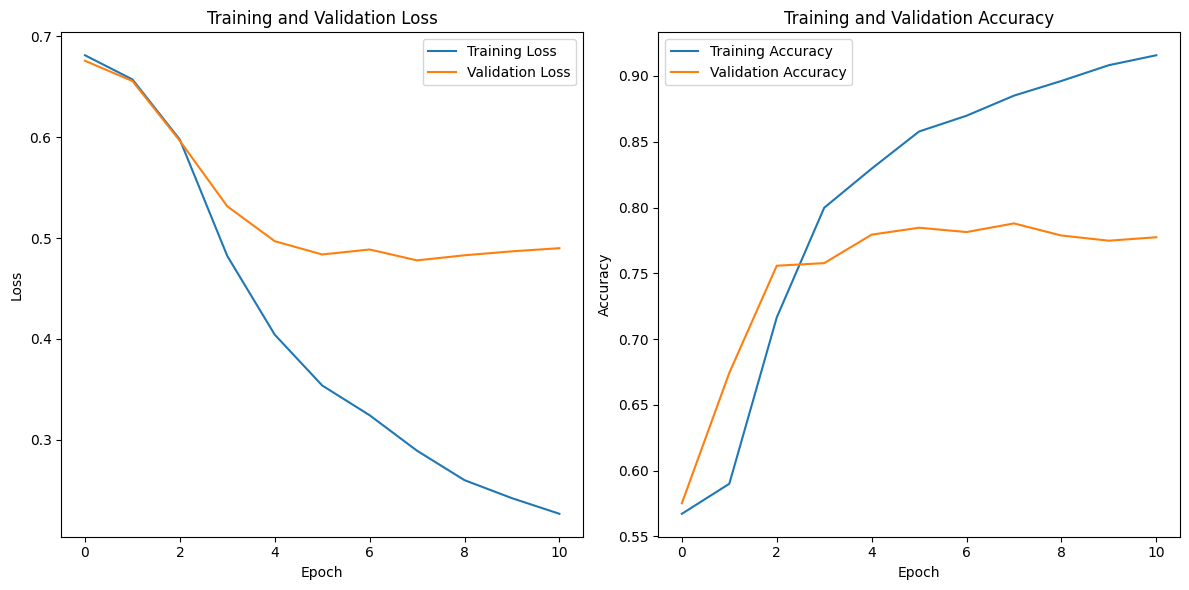

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
GRU Model Validation F1 Score with Best Params: 0.7358953393295177
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [14]:
''' '' '' '' '' '' '' '' '' '' '' '' ''
Model 3 (GRU) Hyperparameter Optimization
'' '' '' '' '' '' '' '' '' '' '' '' '''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Embedding, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, RMSprop
from keras_tuner import RandomSearch

# Data preprocessing
X_train, X_val, y_train, y_val = train_test_split(X_train_pad, train_df['target'], test_size=0.2, random_state=42)

def build_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=10000, output_dim=100, input_length=50))
    model.add(SpatialDropout1D(hp.Choice('dropout_rate', [0.2, 0.3, 0.4, 0.5])))
    model.add(GRU(units=hp.Choice('units', [50, 100]), dropout=hp.Choice('dropout_rate', [0.2, 0.3, 0.4, 0.5]), recurrent_dropout=hp.Choice('dropout_rate', [0.2, 0.3, 0.4, 0.5])))
    model.add(Dense(1, activation='sigmoid'))
    optimizer_choice = hp.Choice('optimizer', ['adam', 'rmsprop'])
    learning_rate = hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
    if optimizer_choice == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    else:
        optimizer = RMSprop(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=3,
    executions_per_trial=3,
    directory='my_dir',
    project_name='gru_tuning'
)

tuner.search_space_summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

tuner.search(X_train, y_train, epochs=20, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Display best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f'Best hyperparameters: {best_hps}')

# Display grid search results
results_gru = pd.DataFrame({
    'Trial': [trial.trial_id for trial in tuner.oracle.trials.values()],
    'Units': [trial.hyperparameters.values['units'] for trial in tuner.oracle.trials.values()],
    'Dropout Rate': [trial.hyperparameters.values['dropout_rate'] for trial in tuner.oracle.trials.values()],
    'Optimizer': [trial.hyperparameters.values['optimizer'] for trial in tuner.oracle.trials.values()],
    'Learning Rate': [trial.hyperparameters.values.get('learning_rate', 'N/A') for trial in tuner.oracle.trials.values()],
    'Validation Accuracy': [trial.score for trial in tuner.oracle.trials.values()]
})
results_gru = results_gru.sort_values(by='Validation Accuracy', ascending=False)

# Add "Best" to the best score
best_score_gru = results_gru['Validation Accuracy'].max()
results_gru['Best'] = results_gru['Validation Accuracy'].apply(lambda x: 'Best' if x == best_score_gru else '')

# Display results in table format
styled_results_gru = results_gru.style.background_gradient(cmap='viridis').applymap(lambda x: 'background-color: yellow; color: black' if x == 'Best' else '')
display(styled_results_gru)

# Train the best model
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate F1 score for the best model
pred3_val = best_model.predict(X_val)
pred3_val = (pred3_val > 0.5).astype(int)
gru_score_val = f1_score(y_val, pred3_val)
print(f'GRU Model Validation F1 Score with Best Params: {gru_score_val}')

# Predict on the test data with the best model
pred3 = best_model.predict(X_test_pad)
pred3 = (pred3 > 0.5).astype(int)


## <span style="color: blue;">🔹 STEP 4</span>

**`Model Comparison`**

Compare the F1 scores of each model to determine which model performed the best. The following code summarizes the F1 scores of each model in a DataFrame and displays it in a table format.


                 Model  Validation F1 Score
0  Logistic Regression             0.618545
1     Ridge Classifier             0.600706
2                  GRU             0.735895


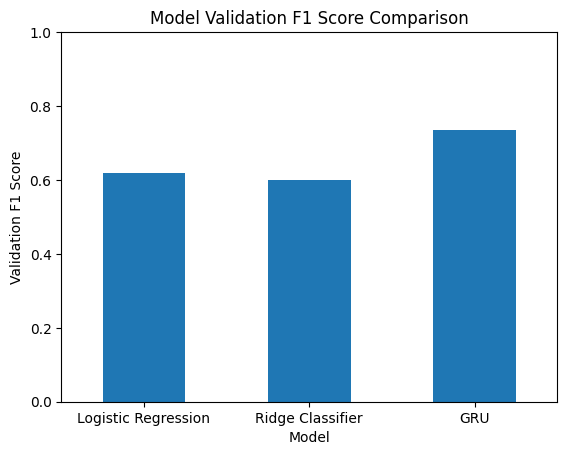

In [19]:
''' '' '' '' '' '' '' '' '' '' '' '' ''
Model Comparison
'' '' '' '' '' '' '' '' '' '' '' '' '''
import pandas as pd
import matplotlib.pyplot as plt

# Combine the best F1 scores of each model into a list
model_names = ['Logistic Regression', 'Ridge Classifier', 'GRU']
f1_scores = [logistic_mean_score, ridge_mean_score, gru_score_val]

# Create a DataFrame to summarize the F1 scores
f1_scores_df = pd.DataFrame({
    'Model': model_names,
    'Validation F1 Score': f1_scores
})

# Display the DataFrame in table format
print(f1_scores_df)

# Visualize the F1 scores
f1_scores_df.set_index('Model', inplace=True)
f1_scores_df.plot(kind='bar', legend=False, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Model Validation F1 Score Comparison')
plt.xlabel('Model')
plt.ylabel('Validation F1 Score')
plt.xticks(rotation=0)
plt.ylim(0, 1)  # Set Y-axis range from 0 to 1
plt.show()


**`Results Analysis`**

This cell includes the comparison and discussion of the results, evaluating which model performed best. It also provides an analysis based on the characteristics and results of each model.

| Model                 | Validation F1 Score |
|-----------------------|---------------------|
| Logistic Regression   | 0.618545            |
| Ridge Classifier      | 0.600706            |
| GRU                   | 0.735895            |


- **Logistic Regression**
    - The F1 score was 0.618545. The logistic regression model is simple and a basic linear model, capable of capturing the basic features of text data but struggling with more complex patterns.
    

- **Ridge Classifier**
    - The F1 score was 0.600706. The ridge classifier can control the complexity of the model through regularization, preventing overfitting. While it is as simple as logistic regression, its ability to capture complex patterns in text data was limited.
    

- **GRU**
    - This analysis showed the highest F1 score of 0.735895. It demonstrated superior performance compared to other models. The GRU model can handle sequential and time-series data, capturing the sequential characteristics of text data. However, training the model took more time and computational resources.
    

**Conclusion**
- In this analysis, the GRU model achieved the highest F1 score, showing the best performance in text data classification. While logistic regression and ridge classifier also showed decent performance, they could not match the GRU model. Future improvements could include trying other neural network architectures and further optimizing hyperparameters. Additionally, efforts should be made to reduce the training time of the GRU model.


## <span style="color: blue;">🔹 STEP 5 Conclusion</span>

- **`Results and Learning`**
    - Through this project, we learned the basic techniques of Natural Language Processing (NLP) and machine learning. We gained experience in comparing the performance of three different models for disaster-related tweet classification. We understood the strengths and limitations of each model and considered their applications.
    

- **`Factors that Contributed to Model Performance Improvement`**
    - **Hyperparameter Optimization**: Tuning the hyperparameters of each model improved their performance.
    - **Use of GRU Model**: Adopting the GRU model, which excels at handling time-series data, achieved higher F1 scores than other models.
    

- **`Factors that Did Not Contribute to Model Performance Improvement`**
    - **Characteristics of Simple Linear Models**: Linear models like logistic regression and ridge classifier had limitations in capturing complex patterns in text data.
    - **Computational Resource Constraints**: Training GRU required significant time and computational resources.
    

- **`Improvement Points`**
    - **Trying Other Neural Network Architectures**: Experiment with other advanced architectures such as LSTM and Bidirectional RNN.
    - **Further Hyperparameter Optimization**: Expanding the range of hyperparameters and conducting more detailed tuning can help find the optimal model.
    - **Data Augmentation and Enhancement**: Collect more data and use data augmentation techniques to enhance the training dataset, improving the model's generalization performance.
    - **Efficient Use of Computational Resources**: Consider techniques to reduce model training time and efficiently utilize computational resources (adjusting learning rates, optimizing batch sizes).


In [ ]:
# Create a DataFrame in the competition submission format

import pandas as pd

predictions = best_model.predict(X_test_pad)
predictions = (predictions > 0.5).astype(int).flatten()

submission_df = pd.DataFrame({
    'id': test_df['id'],
    'target': predictions
})

submission_df.to_csv('submission.csv', index=False)

# Display the first few rows for verification
submission_df.head()
